In [1]:
import math
import time
import random
import numpy as np
import pandas as pd
import pylab 
import scipy.stats as stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
                                            '''
            Fonction qui permet de diviser un echantillon de taille n entre 0 et 1 
                                            '''
def xfrange(start, stop, step):
    index = 0
    while start + index * step < stop:
        yield start + index * step
        index += 1

In [4]:
tab_n = list(range(10000 , 110000,10000)) #liste du nombres a considerer par echantillon [10000,100000, ...]

# 1.1) Simulation par Monte Carlo

In [5]:
                                            '''
                                    Fonction a approcher
                                            '''
def f(x): 
    return math.sqrt(1-(x*x))

In [6]:
data = []
interval_inf = 0
interval_sup = 1

for n in tab_n:

    start = time.time()
    surface    = 0
    dx         = (interval_sup - interval_inf) / n 
    xi_simule  = []
    for x in xfrange(0,1,dx):
        xi_simule.append(f(x)*dx)
        surface = surface + f(x)*dx 
        
    end          = time.time()
    moyenne_emp  = surface
    surface      = surface*4
    
    
    erreur_abs   = abs((math.pi- surface))
    erreur_rel   = (surface-math.pi)/ math.pi
    
    variance     = 1/n*(sum(map(lambda x : x - moyenne_emp, xi_simule))**2)
    ecart_type   = math.sqrt(variance)
    cinterval_inf = moyenne_emp-(1.96*ecart_type/math.sqrt(n))
    cinterval_sup = moyenne_emp+(1.96*ecart_type/math.sqrt(n))
    confidence = [interval_inf,interval_sup]
    
    data.append([
          "Monte Carlo",n,abs(start-end),surface,math.pi,erreur_rel,erreur_abs,confidence
     ])
    
df_monte_carlo = pd.DataFrame(data,columns=["methode","n","temps ecoulé","val. approchée",
                                            "val. réelle","erreur relative","erreur absolue","interval de conf"])

In [7]:
df_monte_carlo

,methode,n,temps ecoulé,val. approchée,val. réelle,erreur relative,erreur absolue,interval de conf
0,Monte Carlo,10000,0.011992,3.141791,3.141593,0.000063,0.000199,"[0, 1]"
1,Monte Carlo,20000,0.023015,3.141692,3.141593,0.000032,0.000100,"[0, 1]"
2,Monte Carlo,30000,0.039027,3.141659,3.141593,0.000021,0.000066,"[0, 1]"
3,Monte Carlo,40000,0.045040,3.141643,3.141593,0.000016,0.000050,"[0, 1]"
4,Monte Carlo,50000,0.056039,3.141633,3.141593,0.000013,0.000040,"[0, 1]"
5,Monte Carlo,60000,0.066046,3.141626,3.141593,0.000011,0.000033,"[0, 1]"
6,Monte Carlo,70000,0.076053,3.141621,3.141593,0.000009,0.000029,"[0, 1]"
7,Monte Carlo,80000,0.086061,3.141618,3.141593,0.000008,0.000025,"[0, 1]"
8,Monte Carlo,90000,0.098069,3.141615,3.141593,0.000007,0.000022,"[0, 1]"
9,Monte Carlo,100000,0.108076,3.141613,3.141593,0.000006,0.000020,"[0, 1]"


# 1.2) Simulation par jet aléatoire

In [8]:
data = []
start = time.time()
for n in tab_n:
    cpt = 0.0
    xi_simule = []
    for i in range(0,n):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        if( x*x+y*y <= 1):
            cpt = cpt+1
            xi_simule.append(1)
            
    end        = time.time()
    
    surface    = cpt*4/n
    erreur_abs = abs((math.pi- surface))
    erreur_rel   = (surface-math.pi)/ math.pi
    
    moyenne_emp = 1/n*cpt
    variance     = 1/n*(sum(map(lambda x : x - moyenne_emp, xi_simule))**2)
    ecart_type   = math.sqrt(variance)
    
    cinterval_inf = moyenne_emp-(1.96*ecart_type/math.sqrt(n))
    cinterval_sup = moyenne_emp+(1.96*ecart_type/math.sqrt(n))
    confidence = [interval_inf,interval_sup]
    
    data.append([
          "Jet aléatoire",n,abs(start-end),surface,math.pi,erreur_rel,erreur_abs,confidence
     ])
    
df_jet_aleatoire = pd.DataFrame(data,columns=["methode","n","temps ecoulé","val. approchée",
                                        "val. réelle","erreur relative","erreur absolue","interval de conf"])

In [9]:
df_jet_aleatoire

,methode,n,temps ecoulé,val. approchée,val. réelle,erreur relative,erreur absolue,interval de conf
0,Jet aléatoire,10000,0.011008,3.102400,3.141593,-0.012475,0.039193,"[0, 1]"
1,Jet aléatoire,20000,0.033023,3.143000,3.141593,0.000448,0.001407,"[0, 1]"
2,Jet aléatoire,30000,0.069049,3.146533,3.141593,0.001573,0.004941,"[0, 1]"
3,Jet aléatoire,40000,0.111095,3.139800,3.141593,-0.000571,0.001793,"[0, 1]"
4,Jet aléatoire,50000,0.165134,3.136560,3.141593,-0.001602,0.005033,"[0, 1]"
5,Jet aléatoire,60000,0.228178,3.132533,3.141593,-0.002884,0.009059,"[0, 1]"
6,Jet aléatoire,70000,0.302231,3.144571,3.141593,0.000948,0.002979,"[0, 1]"
7,Jet aléatoire,80000,0.386290,3.150600,3.141593,0.002867,0.009007,"[0, 1]"
8,Jet aléatoire,90000,0.481357,3.141733,3.141593,0.000045,0.000141,"[0, 1]"
9,Jet aléatoire,100000,0.587428,3.146480,3.141593,0.001556,0.004887,"[0, 1]"


# 1.3) Comparaison des methodes jet aléatoire vs monte carlo

"\n    On remarque dans ce graphe que la methode de monte carlo est beaucoup plus rapide que le comptage aléatoire\n    \n    EN X: le temps ecoulé \n    EN Y: le nombre d'individus pour chaque echantillon\n\n"

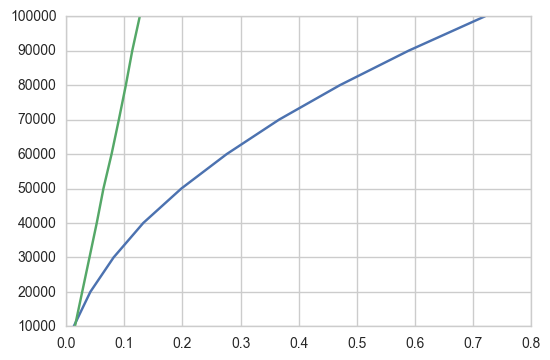

In [257]:
''' 

VITESSE D'APPROXIMATION  

'''
sns.plt.plot(df_jet_aleatoire["temps ecoulé"],df_jet_aleatoire["n"]) # EN BLEU
sns.plt.plot(df_monte_carlo["temps ecoulé"],df_jet_aleatoire["n"]) # EN VERT
'''
    On remarque dans ce graphe que la methode de monte carlo est beaucoup plus rapide que le comptage aléatoire
    
    EN X: le temps ecoulé 
    EN Y: le nombre d'individus pour chaque echantillon

'''

"\n    On remarque dans ce graphe que la methode de monte carlo est beaucoup plus précise que le comptage aléatoire\n        \n    EN X: le nombre d'individus pour chaque echantillon\n    EN Y: le ratio d'erreur relative\n\n"

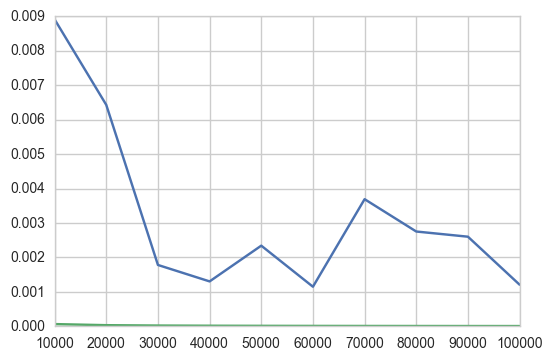

In [270]:
''' 

PRECISION DE CONVERGENCE 

'''
sns.plt.plot(tab_n,df_jet_aleatoire["erreur relative"]) # EN BLEU L"ALEATOIRE
sns.plt.plot(tab_n,df_monte_carlo["erreur relative"]) # EN VERT POUR MONTE_CARLO
'''
    On remarque dans ce graphe que la methode de monte carlo est beaucoup plus précise que le comptage aléatoire
        
    EN X: le nombre d'individus pour chaque echantillon
    EN Y: le ratio d'erreur relative

'''

# 2.1) Simulation d'une loi de proba  [0.10,0.20,0.25,0.45] X [1,2,3,4]

In [10]:
val   = list(range(1,5))
probs = [0.10,0.20,0.25,0.45]

In [11]:
esperance_par_xi_reel = list(map(lambda x,y:x*y,val,probs))
esperance_reel        = sum(esperance_par_xi_reel)

In [12]:
def returnX(prob,probs,val):
    stack = 0
    for i in range(len(probs)):
        stack += probs[i] 
        if prob < stack:
            return val[i]
    return val[len(probs)-1]

In [13]:
def returnX_reverse(prob,probs,val):
    stack = 1
    for i in reversed(range(len(probs))):
        stack -= probs[i]
        if prob > stack:
            return val[i]    
    return val[0]
        

### 2.1.1)  en considerant les proba croissantes

In [51]:
esperance_reel = sum(esperance_par_xi_reel)
data           = []

for n in tab_n:    
    xi_simule = []
    start = time.time()
    
    for i in range(n):
        u = random.uniform(0,1)
        x = returnX(u,probs,val)
        xi_simule.append(x)
 
    end          = time.time()
    
    moyenne_emp  = 1/n * (sum(xi_simule))
    variance     = 1/n*(sum(map(lambda x : (x - moyenne_emp)**2, xi_simule)))
    ecart_type   = math.sqrt(variance)
    erreur_abs   = abs(esperance_reel - moyenne_emp) 
    erreur_rel   = (moyenne_emp - esperance_reel)  / esperance_reel 
    
    cinterval_inf = moyenne_emp-(1.96*ecart_type/math.sqrt(n))
    cinterval_sup = moyenne_emp+(1.96*ecart_type/math.sqrt(n))
    confidence = [str(cinterval_inf),str(cinterval_sup)]
    
    data.append([
          "random de v.a iid",n,abs(start-end),moyenne_emp,esperance_reel,erreur_rel,erreur_abs,ecart_type,confidence
    ])
    
df_loi_croissant = pd.DataFrame(data,columns=["methode","n","temps ecoulé","val. approchée",
                                        "val. réelle","erreur relative","erreur absolue","ecart-type","interval de conf"])

In [52]:
df_loi_croissant

,methode,n,temps ecoulé,val. approchée,val. réelle,erreur relative,erreur absolue,ecart-type,interval de conf
0,random de v.a iid,10000,0.015024,3.045900,3.05,-0.001344,0.004100,1.030239,"[3.025707308057855, 3.066092691942145]"
1,random de v.a iid,20000,0.027007,3.049450,3.05,-0.000180,0.000550,1.019218,"[3.0353243635082943, 3.063575636491706]"
2,random de v.a iid,30000,0.043031,3.060633,3.05,0.003486,0.010633,1.018933,"[3.049103025766618, 3.0721636409000492]"
3,random de v.a iid,40000,0.054038,3.049075,3.05,-0.000303,0.000925,1.025606,"[3.0390240660868875, 3.059125933913113]"
4,random de v.a iid,50000,0.064045,3.058040,3.05,0.002636,0.008040,1.022053,"[3.049081314647308, 3.0669986853526923]"
5,random de v.a iid,60000,0.076053,3.052933,3.05,0.000962,0.002933,1.026059,"[3.044723147549976, 3.0611435191166905]"
6,random de v.a iid,70000,0.091064,3.052186,3.05,0.000717,0.002186,1.025464,"[3.044588969810666, 3.0597824587607625]"
7,random de v.a iid,80000,0.104074,3.046363,3.05,-0.001193,0.003637,1.024677,"[3.0392618504414854, 3.053463149558515]"
8,random de v.a iid,90000,0.120085,3.052300,3.05,0.000754,0.002300,1.025112,"[3.0456026048301568, 3.0589973951698437]"
9,random de v.a iid,100000,0.131093,3.048820,3.05,-0.000387,0.001180,1.022544,"[3.0424822054879037, 3.0551577945120965]"


### 2.1.2) loi en mesurant les proba décroissantes

In [46]:
esperance_reel = sum(esperance_par_xi_reel)
data           = []

for n in tab_n:    
    xi_simule = []
    start = time.time()
    
    for i in range(n):
        u = random.uniform(0,1)
        x = returnX_reverse(u,probs,val)
        xi_simule.append(x)
 
    end          = time.time()
    
    moyenne_emp  = 1/n * (sum(xi_simule))
    variance     = 1/n*(sum(map(lambda x : (x - moyenne_emp)**2, xi_simule)))
    ecart_type   = math.sqrt(variance)
    erreur_abs   = abs(esperance_reel - moyenne_emp) 
    erreur_rel   = (moyenne_emp - esperance_reel)  / esperance_reel 
    
    cinterval_inf = moyenne_emp-(1.96*ecart_type/math.sqrt(n))
    cinterval_sup = moyenne_emp+(1.96*ecart_type/math.sqrt(n))
    confidence = [str(cinterval_inf),str(cinterval_sup)]
    
    data.append([
          "random de v.a iid",n,abs(start-end),moyenne_emp,esperance_reel,erreur_rel,erreur_abs,ecart_type,confidence
    ])
    
df_loi_reverse = pd.DataFrame(data,columns=["methode","n","temps ecoulé","val. approchée",
                                        "val. réelle","erreur relative","erreur absolue","ecart-type","interval de conf"])

    #results.append(["Monte-Carlo",n,end-start,erreur_abs,ecart_type,""])

In [47]:
df_loi_reverse

,methode,n,temps ecoulé,val. approchée,val. réelle,erreur relative,erreur absolue,ecart-type,interval de conf
0,random de v.a iid,10000,0.014010,3.051800,3.05,0.000590,0.001800,1.025922,"[3.0316919210633735, 3.0719080789366267]"
1,random de v.a iid,20000,0.029020,3.049150,3.05,-0.000279,0.000850,1.016580,"[3.035060924231086, 3.063239075768914]"
2,random de v.a iid,30000,0.045031,3.047533,3.05,-0.000809,0.002467,1.023690,"[3.03594919397433, 3.059117472692337]"
3,random de v.a iid,40000,0.058046,3.046850,3.05,-0.001033,0.003150,1.021203,"[3.0368422129497534, 3.0568577870502467]"
4,random de v.a iid,50000,0.071051,3.051400,3.05,0.000459,0.001400,1.026508,"[3.042402263370752, 3.0603977366292483]"
5,random de v.a iid,60000,0.083059,3.053717,3.05,0.001219,0.003717,1.020995,"[3.0455470036323766, 3.061886329700957]"
6,random de v.a iid,70000,0.098066,3.046714,3.05,-0.001077,0.003286,1.022177,"[3.039141890616299, 3.0542866808122726]"
7,random de v.a iid,80000,0.112077,3.051850,3.05,0.000607,0.001850,1.021438,"[3.044771792426641, 3.058928207573359]"
8,random de v.a iid,90000,0.126094,3.054444,3.05,0.001457,0.004444,1.024051,"[3.0477539785608654, 3.0611349103280237]"
9,random de v.a iid,100000,0.140095,3.058700,3.05,0.002852,0.008700,1.021594,"[3.0523680947596334, 3.0650319052403674]"


# 2.2) Comparaison des methodes (simulation avec xi ordonnés croissants VS décroissants)

"\n    On remarque dans ce graphe que la methode reverse (prob décroissante) est plus lente que le la methode croissante \n    vitesse(bleu) > vitesse(vert)\n    \n    EN X: le temps ecoulé \n    EN Y: le nombre d'individus pour chaque echantillon\n\n"

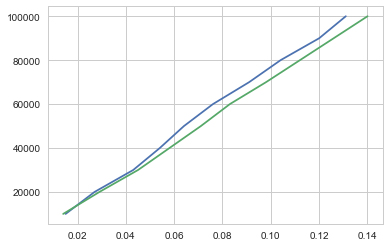

In [53]:
''' 

VITESSE D'APPROXIMATION  

'''
sns.plt.plot(df_loi_croissant["temps ecoulé"],tab_n) # EN BLEU
sns.plt.plot(df_loi_reverse["temps ecoulé"],tab_n) # EN VERT
'''
    On remarque dans ce graphe que la methode reverse (prob décroissante) est plus lente que le la methode croissante 
    vitesse(bleu) > vitesse(vert)
    
    AXE X: le temps ecoulé 
    AXE Y: le nombre d'individus pour chaque echantillon

'''

"\n    On remarque dans ce graphe que la methode de monte carlo est beaucoup plus précise que le comptage aléatoire\n        \n    EN X: le nombre d'individus pour chaque echantillon\n    EN Y: le ratio d'erreur relative\n\n"

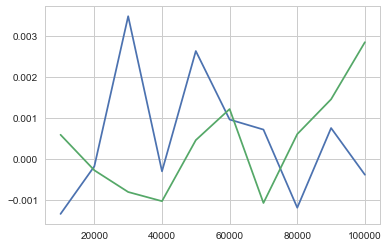

In [54]:
''' 

PRECISION DE CONVERGENCE 

'''
sns.plt.plot(tab_n,df_loi_croissant["erreur relative"]) # EN BLEU loi normale ordered probs
sns.plt.plot(tab_n,df_loi_reverse["erreur relative"]) #VERT loi normale reversed probs
'''
        
    AXE X: le nombre d'individus pour chaque echantillon
    AXE Y: le ratio d'erreur relative

'''

# 3.1) Simulation de loi géometrique (pseudo inverse de la f.d.r) q = 0.7

In [24]:
data = []

q = 0.7
esperance_reel = q/(1-q)

for n in tab_n:
    xi_simule = []
    stack = 0
    start = time.time()
    for index in range(n):
        u = random.uniform(0,1)
        i = 1 
        while True:
            if 1-(q**(i-1)) <= u < 1-(q**(i)):
                break
            else:
                i+=1
        xi_simule.append(i-1)
    end = time.time()
    moyenne_emp = 1/n * sum(xi_simule)
    variance     = 1/n*(sum(map(lambda x : (x - moyenne_emp)**2, xi_simule)))
    ecart_type   = math.sqrt(variance)
    erreur_abs   = abs(esperance_reel - moyenne_emp)
    erreur_rel   = (moyenne_emp - esperance_reel )/ esperance_reel
    
    cinterval_inf = moyenne_emp-(1.96*ecart_type/math.sqrt(n))
    cinterval_sup = moyenne_emp+(1.96*ecart_type/math.sqrt(n))
    confidence = [str(cinterval_inf),str(cinterval_sup)]
    
    data.append([
          "invers fdr geo",n,abs(start-end),moyenne_emp,esperance_reel,(erreur_abs),erreur_rel,ecart_type,confidence
    ])
    
df_loi_geom_inv_fdr = pd.DataFrame(data,columns=["methode","n","temps ecoulé","val. approchée",
                                        "val. réelle","erreur relative","erreur absolue","ecart-type","interval de conf"])   

In [25]:
df_loi_geom_inv_fdr

,methode,n,temps ecoulé,val. approchée,val. réelle,erreur relative,erreur absolue,ecart-type,interval de conf
0,invers fdr geo,10000,0.023999,2.314400,2.333333,0.018933,-0.008114,2.763033,"[2.2602445486568308, 2.3685554513431692]"
1,invers fdr geo,20000,0.050041,2.284700,2.333333,0.048633,-0.020843,2.759918,"[2.2464494916845155, 2.3229505083154844]"
2,invers fdr geo,30000,0.073046,2.330867,2.333333,0.002467,-0.001057,2.809685,"[2.2990720929371085, 2.362661240396225]"
3,invers fdr geo,40000,0.095068,2.325525,2.333333,0.007808,-0.003346,2.759829,"[2.2984786716007717, 2.352571328399229]"
4,invers fdr geo,50000,0.120066,2.351080,2.333333,0.017747,0.007606,2.793804,"[2.326591225008362, 2.3755687749916383]"
5,invers fdr geo,60000,0.142101,2.327233,2.333333,0.006100,-0.002614,2.782137,"[2.304971602754095, 2.349495063912572]"
6,invers fdr geo,70000,0.170120,2.332157,2.333333,0.001176,-0.000504,2.787800,"[2.3115048315291404, 2.3528094541851448]"
7,invers fdr geo,80000,0.202141,2.334588,2.333333,0.001254,0.000538,2.810091,"[2.3151145600548784, 2.3540604399451217]"
8,invers fdr geo,90000,0.224158,2.336556,2.333333,0.003222,0.001381,2.788763,"[2.3183356396848978, 2.3547754714262132]"
9,invers fdr geo,100000,0.246174,2.335820,2.333333,0.002487,0.001066,2.780361,"[2.3185871466176136, 2.3530528533823865]"


# 3.2) Simulation de loi géometrique par la formule LN  ( q = 0.7) 

In [26]:
esperance_reel = q/(1-q)
data = []
for n in tab_n:
    xi_simule = []
    
    start = time.time()
    
    for index in range(n):
        
        xi = int(math.log( (1-random.uniform(0,1) ) ) / math.log(q))
        xi_simule.append(xi)
    
    end = time.time()
    
    moyenne_emp = 1/n * sum(xi_simule)
    variance     = 1/n*(sum(map(lambda x : (x - moyenne_emp)**2, xi_simule)))
    ecart_type   = math.sqrt(variance)
    erreur_abs   = abs(esperance_reel - moyenne_emp) 
    erreur_rel   = (moyenne_emp-esperance_reel) / esperance_reel
    cinterval_inf = moyenne_emp-(1.96*ecart_type/math.sqrt(n))
    cinterval_sup = moyenne_emp+(1.96*ecart_type/math.sqrt(n))
    confidence = [str(cinterval_inf),str(cinterval_sup)]
    
    data.append([
          "Loi geo app. par LN",n,abs(start-end),moyenne_emp,esperance_reel,erreur_abs,erreur_rel,ecart_type,confidence
    ])
    
df_loi_geom_LN = pd.DataFrame(data,columns=["methode","n","temps ecoulé","val. approchée",
                                        "val. réelle","erreur_abs","erreur relative","ecart-type","interval de conf"])
    

In [27]:
df_loi_geom_LN

,methode,n,temps ecoulé,val. approchée,val. réelle,erreur_abs,erreur relative,ecart-type,interval de conf
0,Loi geo app. par LN,10000,0.015014,2.292200,2.333333,0.041133,-0.017629,2.800075,"[2.2373185329596104, 2.34708146704039]"
1,Loi geo app. par LN,20000,0.022998,2.333550,2.333333,0.000217,0.000093,2.799749,"[2.2947474586931262, 2.3723525413068742]"
2,Loi geo app. par LN,30000,0.037034,2.320167,2.333333,0.013167,-0.005643,2.767573,"[2.2888486306334777, 2.3514847026998558]"
3,Loi geo app. par LN,40000,0.044014,2.317850,2.333333,0.015483,-0.006636,2.755163,"[2.290849405764036, 2.344850594235964]"
4,Loi geo app. par LN,50000,0.054042,2.327880,2.333333,0.005453,-0.002337,2.769595,"[2.303603432237226, 2.352156567762775]"
5,Loi geo app. par LN,60000,0.065046,2.323683,2.333333,0.009650,-0.004136,2.786715,"[2.3013849712897927, 2.345981695376874]"
6,Loi geo app. par LN,70000,0.074053,2.329429,2.333333,0.003905,-0.001673,2.763516,"[2.3089561597562795, 2.349900983100863]"
7,Loi geo app. par LN,80000,0.087057,2.332088,2.333333,0.001246,-0.000534,2.791475,"[2.3127435679943233, 2.351431432005677]"
8,Loi geo app. par LN,90000,0.098064,2.327444,2.333333,0.005889,-0.002524,2.790468,"[2.3092133847254313, 2.345675504163458]"
9,Loi geo app. par LN,100000,0.108081,2.333520,2.333333,0.000187,0.000080,2.783075,"[2.316270324716125, 2.350769675283875]"


# 3.3) Comparaison des methodes fdr vs ln

"\n    \n    EN X: le temps ecoulé \n    EN Y: le nombre d'individus pour chaque echantillon\n\n"

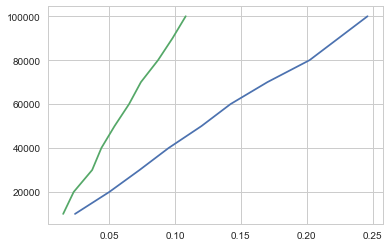

In [28]:
''' 

VITESSE D'APPROXIMATION  

'''
sns.plt.plot(df_loi_geom_inv_fdr["temps ecoulé"],tab_n) # EN BLEU, inverse de fdr
sns.plt.plot(df_loi_geom_LN["temps ecoulé"],tab_n) # EN VERT, ln(1-q)/ln(q)
'''
    temps simulation par LN(vert) plus rapide que l'inverse de fdr(bleu)
    
    EN X: le temps ecoulé 
    EN Y: le nombre d'individus pour chaque echantillon

'''

"\n        \n    EN X: le nombre d'individus pour chaque echantillon\n    EN Y: le ratio d'erreur relative\n\n"

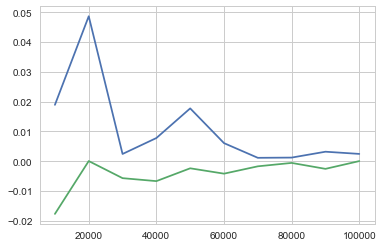

In [29]:
''' 

PRECISION DE CONVERGENCE 

'''
sns.plt.plot(tab_n,df_loi_geom_inv_fdr["erreur relative"])  # EN BLEU, inverse de fdr
sns.plt.plot(tab_n,df_loi_geom_LN["erreur relative"])  # EN VERT, ln(1-q)/ln(q)
'''
        
    EN X: le nombre d'individus pour chaque echantillon
    EN Y: le ratio d'erreur relative

'''

# 4.1) Simulation de loi normale par box muller 

In [34]:
esperance_reel = 0
data = []
for n in tab_n:
    xi_simule = []
    
    start = time.time()
    
    for index in range(n):
        u1 = random.uniform(0,1)
        u2 = random.uniform(0,1)
        xi = math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
        xi_simule.append(xi)
    
    end = time.time()
    
    moyenne_emp = 1/n * sum(xi_simule)
    variance     = 1/n*(sum(map(lambda x : (x - moyenne_emp)**2, xi_simule)))
    ecart_type   = math.sqrt(variance)
    
    erreur_abs   = abs(esperance_reel - moyenne_emp) 
    #erreur_rel   = (moyenne_emp-esperance_reel) / esperance_reel
    
    cinterval_inf = moyenne_emp-(1.96*ecart_type/math.sqrt(n))
    cinterval_sup = moyenne_emp+(1.96*ecart_type/math.sqrt(n))
    confidence = [str(cinterval_inf),str(cinterval_sup)]
    
    data.append([
          "Loi normale par box muller",n,abs(start-end),moyenne_emp,esperance_reel,erreur_abs,"/",ecart_type,confidence
    ])
    
df_loi_box_muller = pd.DataFrame(data,columns=["methode","n","temps ecoulé","val. approchée",
                                        "val. réelle","erreur_abs","erreur relative","ecart-type","interval de conf"])
    

In [35]:
df_loi_box_muller

,methode,n,temps ecoulé,val. approchée,val. réelle,erreur_abs,erreur relative,ecart-type,interval de conf
0,Loi normale par box muller,10000,0.016015,0.008629,0,0.008629,/,0.994993,"[-0.010872855942439988, 0.028130868334351446]"
1,Loi normale par box muller,20000,0.032023,-0.004185,0,0.004185,/,0.998062,"[-0.018017561098649847, 0.00964731162554882]"
2,Loi normale par box muller,30000,0.053038,0.008851,0,0.008851,/,1.000012,"[-0.0024656046868581447, 0.020166790781300493]"
3,Loi normale par box muller,40000,0.064045,0.002645,0,0.002645,/,0.995718,"[-0.0071132380374202015, 0.012402829868671054]"
4,Loi normale par box muller,50000,0.076054,-0.003633,0,0.003633,/,0.999449,"[-0.012393800959889793, 0.005127305978765914]"
5,Loi normale par box muller,60000,0.092061,0.002445,0,0.002445,/,0.997918,"[-0.00553985349722275, 0.010430167391038307]"
6,Loi normale par box muller,70000,0.106075,-0.005453,0,0.005453,/,0.998987,"[-0.012853899739846394, 0.0019473017472156672]"
7,Loi normale par box muller,80000,0.123083,0.002339,0,0.002339,/,0.995314,"[-0.004558673072389268, 0.009235680959442213]"
8,Loi normale par box muller,90000,0.140098,-0.003763,0,0.003763,/,0.997056,"[-0.010277549716358119, 0.002750653104702119]"
9,Loi normale par box muller,100000,0.157111,-0.004621,0,0.004621,/,0.999963,"[-0.010818367897752394, 0.0015773075998526346]"


# 4.2) Simulation d'une loi normale par coordonnées polaires

In [44]:
esperance_reel = 0
data = []
for n in tab_n:
    xi_simule = []
    
    start = time.time()
    
    for index in range(int(n/2)):
        while True:
            v1 = 2*random.uniform(0,1)-1
            v2 = 2*random.uniform(0,1)-1
            s = (v1**2) + (v2**2)
            if s < 1 : 
                x = v1* ((-2*math.log(s)/s)**0.5)
                y = v2* ((-2*math.log(s)/s)**0.5)        
                xi_simule.append(x)
                xi_simule.append(y)
                break     
    
    end = time.time()
    
    moyenne_emp = 1/n * sum(xi_simule)
    variance     = 1/n*(sum(map(lambda x : (x - moyenne_emp)**2, xi_simule)))
    ecart_type   = math.sqrt(variance)
    
    erreur_abs   = abs(esperance_reel - moyenne_emp) 
    #erreur_rel   = (moyenne_emp-esperance_reel) / esperance_reel
    
    cinterval_inf = moyenne_emp-(1.96*ecart_type/math.sqrt(n))
    cinterval_sup = moyenne_emp+(1.96*ecart_type/math.sqrt(n))
    confidence = [str(cinterval_inf),str(cinterval_sup)]
    
    data.append([
          "Loi normale par coordonnées polaires",n,abs(start-end),moyenne_emp,esperance_reel,erreur_abs,"/",ecart_type,confidence
    ])
    
df_coord_pol = pd.DataFrame(data,columns=["methode","n","temps ecoulé","val. approchée",
                                        "val. réelle","erreur_abs","erreur relative","ecart-type","interval de conf"])
    

In [45]:
df_coord_pol

,methode,n,temps ecoulé,val. approchée,val. réelle,erreur_abs,erreur relative,ecart-type,interval de conf
0,Loi normale par coordonnées polaires,10000,0.015011,0.007316,0,0.007316,/,0.995819,"[-0.012201731423243128, 0.026834367317291254]"
1,Loi normale par coordonnées polaires,20000,0.030022,-0.002100,0,0.002100,/,1.001672,"[-0.015982249680582164, 0.011782675704344967]"
2,Loi normale par coordonnées polaires,30000,0.046033,0.005063,0,0.005063,/,0.996209,"[-0.006210204580039024, 0.016336127742264672]"
3,Loi normale par coordonnées polaires,40000,0.059052,-0.000169,0,0.000169,/,0.997800,"[-0.009947287965709973, 0.009609591409405937]"
4,Loi normale par coordonnées polaires,50000,0.071054,0.007822,0,0.007822,/,0.996488,"[-0.0009122032210085364, 0.016556995775161933]"
5,Loi normale par coordonnées polaires,60000,0.086066,0.003771,0,0.003771,/,0.998526,"[-0.004218437434071356, 0.01176130977138605]"
6,Loi normale par coordonnées polaires,70000,0.098070,0.005668,0,0.005668,/,0.998709,"[-0.0017308675248928892, 0.013066217000848424]"
7,Loi normale par coordonnées polaires,80000,0.113079,-0.005274,0,0.005274,/,0.999300,"[-0.01219926717213696, 0.0016503269056373877]"
8,Loi normale par coordonnées polaires,90000,0.130084,0.001953,0,0.001953,/,1.002218,"[-0.004594597895804125, 0.00850104501593632]"
9,Loi normale par coordonnées polaires,100000,0.157102,-0.005369,0,0.005369,/,0.995158,"[-0.011537270017506984, 0.0007988347189662546]"


# 4.3) Comparaison des deux methodes box muller vs coord. polaires

"\n    temps simulation par LN(vert) plus rapide que l'inverse de fdr(bleu)\n    \n    EN X: le temps ecoulé \n    EN Y: le nombre d'individus pour chaque echantillon\n\n"

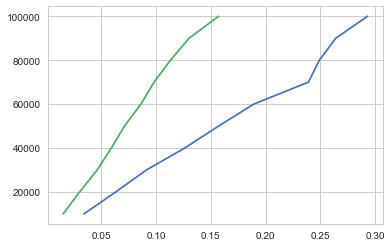

In [57]:
''' 

VITESSE D'APPROXIMATION  

'''
sns.plt.plot(df_loi_box_muller["temps ecoulé"],tab_n) # EN BLEU, box muller
sns.plt.plot(df_coord_pol["temps ecoulé"],tab_n) # EN VERT, coord pol
'''
    temps simulation par coordonnées polaire plus rapide que box muller
    
    EN X: le temps ecoulé 
    EN Y: le nombre d'individus pour chaque echantillon

'''

"\n        \n    AXE X: le nombre d'individus pour chaque echantillon\n    AXE Y: le ratio d'erreur relative\n\n"

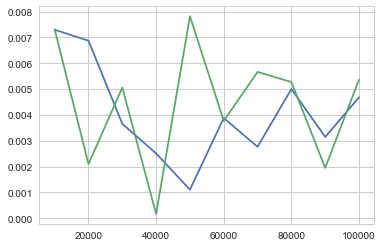

In [59]:
''' 

PRECISION DE CONVERGENCE ( erreur absolue)

'''
sns.plt.plot(tab_n,df_loi_box_muller["erreur_abs"]) # EN BLEU box muller
sns.plt.plot(tab_n,df_coord_pol["erreur_abs"]) #VERT loi coord pol.
'''
        
    AXE X: le nombre d'individus pour chaque echantillon
    AXE Y: le ratio d'erreur relative

'''

# 5) TP N° - histo simple des echantillons

In [155]:
data = pd.read_csv("FichierExos-2-mars-17.csv",sep=";")

In [70]:
data.head()

,numero,echantillon1,echantillon 2,echantillon 3
0,1,8.637610,3.671722,6.872459
1,2,7.384429,2.061696,5.348873
2,3,7.943230,2.700771,5.981349
3,4,6.736876,1.465122,4.699120
4,5,12.569051,13.548792,15.086650


In [156]:
data = data.drop("numero",axis=1)

In [157]:
melted = pd.melt(data)

### 5.1 ) observation d'histogramme des echantillons , (bins = 60)

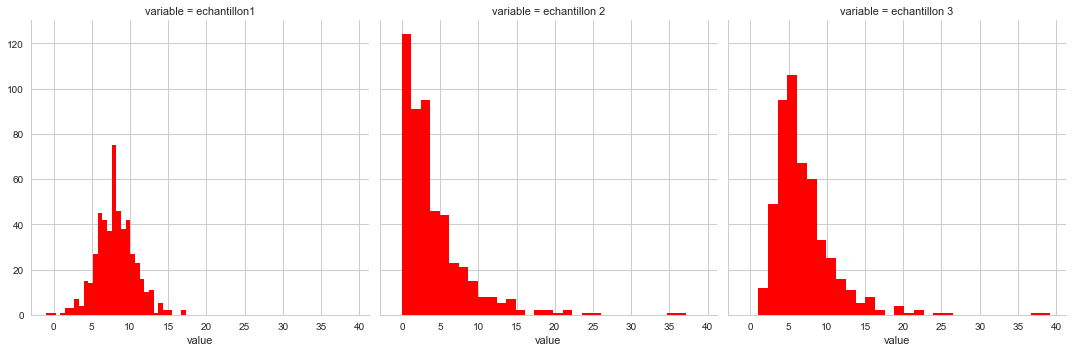

In [248]:
g = sns.FacetGrid(melted, col="variable",size=5)
g = g.map(plt.hist, "value", bins=30, color="r",)

In [ ]:
g = sns.FacetGrid(melted, col="variable",size=5)
g = g.map(plt.hist, "value", bins=60, color="r")

### 5.2) Transformation LOG de l'échantillon et observation des histogrammes (bins = 60) 

In [ ]:
# sous log :

In [250]:
melted.value = np.log(melted.value)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


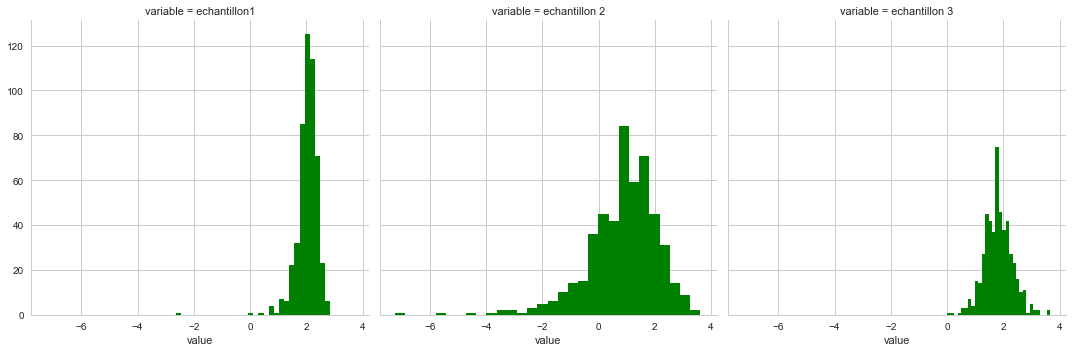

In [251]:
g = sns.FacetGrid(melted, col="variable",size=5)
g = g.map(plt.hist, "value", bins=30, color="g",)

In [254]:
data.describe()

,echantillon1,echantillon 2,echantillon 3
count,500.000000,500.000000,500.000000
mean,8.089597,4.135782,7.009845
std,2.499882,4.462157,4.104325
min,-0.925944,0.000713,1.014921
25%,6.456409,1.250496,4.442791
50%,7.948792,2.707749,5.988005
75%,9.681979,5.536576,8.468879
max,17.346936,37.154946,39.227859


# 1) determination loi echantillon 1

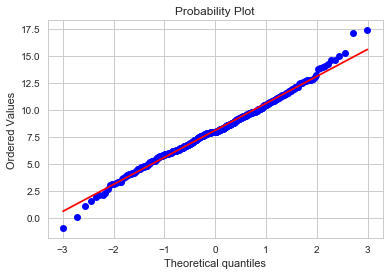

In [259]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(data["echantillon1"], dist=stats.norm, plot=ax1)
ax.set_title("Probplot for exponential distrib")

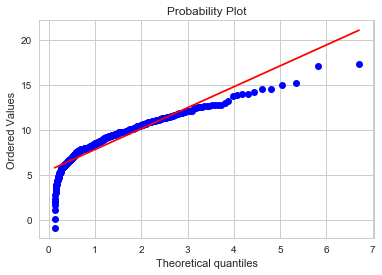

In [265]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(data["echantillon1"], dist=stats.expon,sparams=(1/np.mean(data["echantillon1"])), plot=ax1)
ax.set_title("Probplot for exponential distrib")

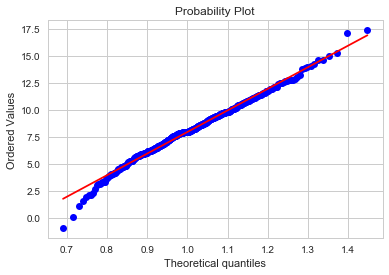

In [284]:

fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(data["echantillon1"], dist=stats.lognorm,sparams=(1/np.mean(data["echantillon1"])), plot=ax1)
ax.set_title("Probplot for exponential distrib")

# 2) determination de la loi echantillon 2 

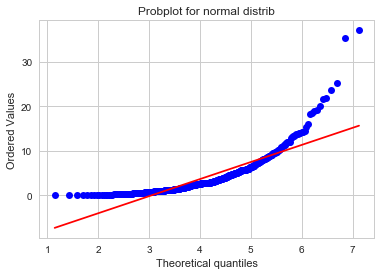

In [274]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(data["echantillon 2"], dist=stats.norm,sparams=(np.mean(data["echantillon 2"])), plot=ax1)
ax1.set_title("Probplot for normal distrib")

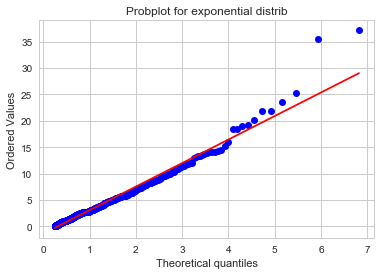

In [267]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(data["echantillon 2"], dist=stats.expon,sparams=(1/np.mean(data["echantillon 2"])), plot=ax1)
ax1.set_title("Probplot for exponential distrib")

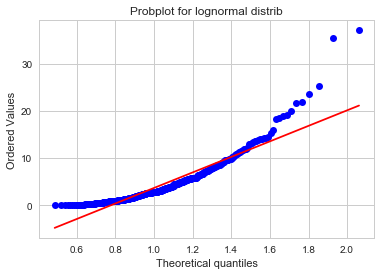

In [283]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(data["echantillon 2"], dist=stats.lognorm,sparams=(1/np.mean(data["echantillon 2"])), plot=ax1,)
ax1.set_title("Probplot for lognormal distrib")

# 3) determination de la loi echantillon 3 

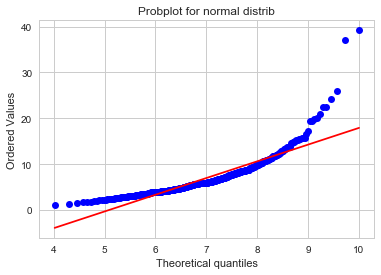

In [278]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(data["echantillon 3"], dist=stats.norm,sparams=(np.mean(data["echantillon 3"])), plot=ax1)
ax1.set_title("Probplot for normal distrib")

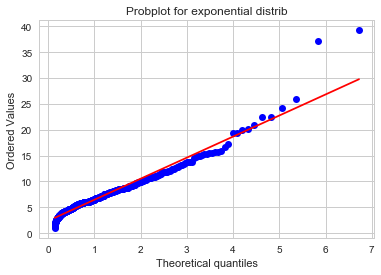

In [279]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(data["echantillon 3"], dist=stats.expon,sparams=(1/np.mean(data["echantillon 3"])), plot=ax1)
ax1.set_title("Probplot for exponential distrib")

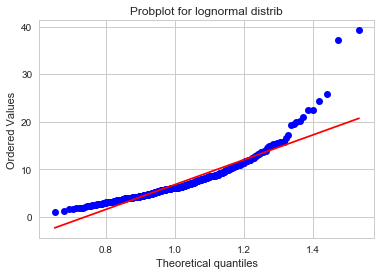

In [282]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(data["echantillon 3"], dist=stats.lognorm,sparams=(1/np.mean(data["echantillon 3"])), plot=ax1,)
ax1.set_title("Probplot for lognormal distrib")

# 4) determination pour l'échantillon 2 & 3 en utilisant le log

NameError: name 'data' is not defined

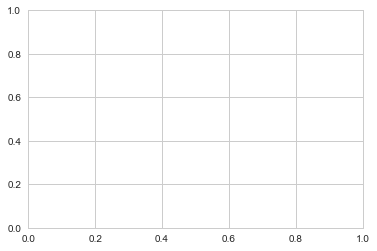

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

esperance_empirique = np.mean(data["echantillon 2"])
std_squared         = np.std(data["echantillon 2"])**2
esperance_log       = math.exp(esperance_empirique - std_squared)
variance_log        = np.exp(std_squared - 1) * np.exp((2*esperance_empirique) + std_squared)

res = stats.probplot(np.log(data["echantillon 2"]), dist=stats.norm,sparams=(esperance_log,variance_log), plot=ax1)
ax1.set_title("Probplot for normal distrib")

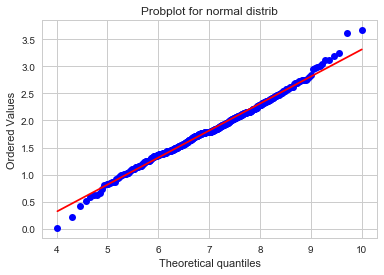

In [288]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(np.log(data["echantillon 3"]), dist=stats.norm,sparams=(np.mean(data["echantillon 3"])), plot=ax1)
ax1.set_title("Probplot for normal distrib")

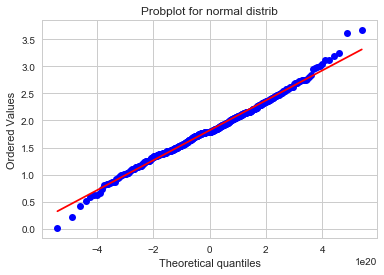

In [289]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

esperance_empirique = np.mean(data["echantillon 3"])
std_squared         = np.std(data["echantillon 3"])**2
esperance_log       = math.exp(esperance_empirique - std_squared)
variance_log        = np.exp(std_squared - 1) * np.exp((2*esperance_empirique) + std_squared)

res = stats.probplot(np.log(data["echantillon 3"]), dist=stats.norm,sparams=(esperance_log,variance_log), plot=ax1)
ax1.set_title("Probplot for normal distrib")